In [1]:
import sys
import os

# Agrega la ruta del directorio padre (donde está src/)
sys.path.append(os.path.abspath(".."))

# 🏥 Proyecto: Predicción de Readmisión Hospitalaria
Este notebook está diseñado para ejecutarse en **Google Colab**.

Contiene todo el flujo del proyecto:
- Exploración de datos (EDA)
- Entrenamiento de modelo base (Regresión Logística)
- Entrenamiento de Red Neuronal
- Evaluación y comparación de modelos

🔧 Los estudiantes pueden modificar el código y los archivos como `config.yaml` o `train.py`.

In [2]:
# Clonar el repositorio (solo una vez por sesión de Colab)
!git clone https://github.com/solivare/DeepNeuralNetworkUSS.git
%cd DeepNeuralNetworkUSS/Projects/HospitalReadmission


Cloning into 'DeepNeuralNetworkUSS'...
remote: Enumerating objects: 1224, done.
remote: Counting objects: 100% (1224/1224), done.
remote: Compressing objects: 100% (1091/1091), done.
remote: Total 1224 (delta 108), reused 1188 (delta 86), pack-reused 0 (from 0)
Receiving objects: 100% (1224/1224), 37.66 MiB | 9.33 MiB/s, done.
Resolving deltas: 100% (108/108), done.
/content/DeepNeuralNetworkUSS/Projects/HospitalReadmission


In [3]:
# Instalar dependencias necesarias (si no están ya instaladas)
!pip install -r requirements.txt

In [4]:
# Creacion del directorio de trabajo
%mkdir run
%cd run/

/content/DeepNeuralNetworkUSS/Projects/HospitalReadmission/run


In [5]:
# Preprocesamiento del dataset original
!python ../src/preprocess.py

Cargando datos desde ../data/diabetic_data.csv
Reemplazando '?' por NaN...
Valores NaN por columna:
weight               98569
max_glu_serum        96420
A1Cresult            84748
medical_specialty    49949
payer_code           40256
race                  2273
diag_3                1423
diag_2                 358
diag_1                  21
patient_nbr              0
dtype: int64

Eliminando columnas irrelevantes o con muchos NaNs...
Eliminando filas con NaN en columnas críticas (race, gender, age)...
Convirtiendo variable objetivo...
Eliminando columnas con un solo valor único...
Codificando variables categóricas...
Guardando dataset limpio en ../data/hospital_readmission_clean.csv
✅ Preprocesamiento finalizado.
📦 Registros finales: 99493  |  Variables: 2322
🔍 Distribución del target:
readmitted
0    0.887741
1    0.112259
Name: proportion, dtype: float64


In [6]:
# Exploración de Datos (EDA)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/hospital_readmission_clean.csv')
df.head()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,insulin_Steady,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes
0,6,25,1,1,41,0,1,0,0,0,...,False,False,True,False,False,False,False,False,True,False
1,1,1,7,3,59,0,18,0,0,0,...,False,True,True,False,False,False,False,False,False,True
2,1,1,7,2,11,5,13,2,0,1,...,False,False,True,False,False,False,False,False,True,True
3,1,1,7,2,44,1,16,0,0,0,...,False,True,True,False,False,False,False,False,False,True
4,1,1,7,1,51,0,8,0,0,0,...,True,False,True,False,False,False,False,False,False,True


In [7]:
# Modelo base: Regresión Logística
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sys.path.append(os.path.abspath(".."))
import src.evaluate as ev
import numpy as np
import yaml

# Cargar configuración y datos
with open('../config.yaml', 'r') as f:
    config = yaml.safe_load(f)
df = pd.read_csv('../data/hospital_readmission_clean.csv')
X = df.drop('readmitted', axis=1)
y = df['readmitted']

# Escalar y separar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=config['test_size'],
    random_state=config['random_state'], stratify=y)

# Entrenar modelo base
base_model = LogisticRegression()
base_model.fit(X_train, y_train)
y_pred_base = base_model.predict(X_test)
y_pred_proba_base = base_model.predict_proba(X_test)[:, 1]

# Evaluar modelo base
ev.evaluate_model(y_test, y_pred_base, y_pred_proba_base, model_name="Regresión Logística")


📊 Evaluación del modelo: Regresión Logística
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     17665
           1       0.33      0.03      0.05      2234

    accuracy                           0.88     19899
   macro avg       0.61      0.51      0.49     19899
weighted avg       0.83      0.88      0.84     19899

F1 Score     : 0.0504
Precision    : 0.3297
Recall       : 0.0273
ROC AUC      : 0.6312


{'f1': 0.050434063662670524,
 'precision': 0.32972972972972975,
 'recall': 0.02730528200537153,
 'roc_auc': np.float64(0.631241617277284)}

In [8]:
# Entrenamiento de Red Neuronal
sys.path.append(os.path.abspath(".."))
import src.train as tr
model = tr.build_model(config, input_dim=X_train.shape[1])
history = tr.train_model(model, X_train, y_train, config)
y_pred_nn_proba = model.predict(X_test).flatten()
y_pred_nn = ev.predict_with_threshold(y_pred_nn_proba)

ev.evaluate_model(y_test, y_pred_nn, y_pred_nn_proba, model_name="Red Neuronal")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8785 - loss: 0.4472 - val_accuracy: 0.8888 - val_loss: 0.3827
Epoch 2/20
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8863 - loss: 0.3726 - val_accuracy: 0.8890 - val_loss: 0.3640
Epoch 3/20
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.8884 - loss: 0.3544 - val_accuracy: 0.8891 - val_loss: 0.3604
Epoch 4/20
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8884 - loss: 0.3464 - val_accuracy: 0.8889 - val_loss: 0.3576
Epoch 5/20
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8876 - loss: 0.3452 - val_accuracy: 0.8889 - val_loss: 0.3569
Epoch 6/20
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8871 - loss: 0.3418 - val_accuracy: 0.8889 - val_loss: 0.3553
Epoch 7/20
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8885 - loss: 0.3361 - val_accuracy: 0.8889 - val_loss: 0.3545
Epoch 8/20
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8908 - loss: 0

{'f1': 0.020122484689413824,
 'precision': 0.4423076923076923,
 'recall': 0.010295434198746643,
 'roc_auc': np.float64(0.62801266787301)}

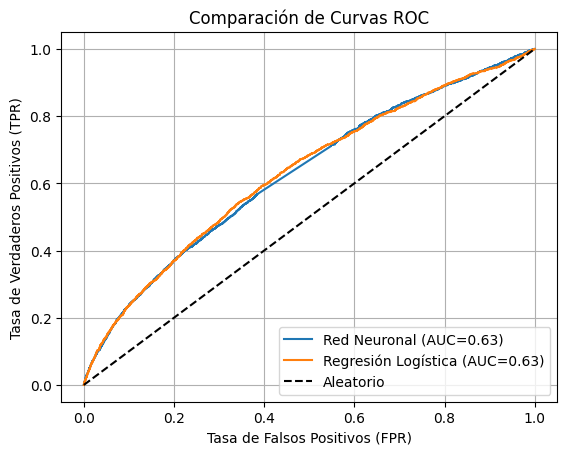

,Modelo,Precision,Recall,F1-score,ROC AUC
0,Red Neuronal,0.442308,0.010295,0.020122,0.628013
1,Regresión Logística,0.329730,0.027305,0.050434,0.631242


In [9]:
# Comparación de ROC y métricas
ev.plot_roc_comparison(y_test, y_pred_nn_proba, y_test, y_pred_proba_base,
                       label1='Red Neuronal', label2='Regresión Logística')

df_metrics = ev.compare_models_metrics(
    y_test, y_pred_nn, y_pred_nn_proba,
    y_test, y_pred_base, y_pred_proba_base,
    model_name_1='Red Neuronal', model_name_2='Regresión Logística')
import pandas as pd
from IPython.display import display
display(df_metrics)